In [1]:
import numpy as np
import pandas as pd
import torch

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## DATA PREPROCESSING

In [3]:
reviews = pd.read_json('../data/IMDB_reviews.json', lines=True)
movies = pd.read_json('../data/IMDB_movie_details.json', lines=True)

In [4]:
reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [5]:
def replace_string_binary(x):
    if x:
        return 1
    return 0

reviews['is_spoiler'] = reviews['is_spoiler'].apply(lambda x: replace_string_binary(x))
reviews

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573908,8 August 1999,tt0139239,ur0100166,0,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,0,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,0,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,0,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


In [6]:
from nltk import download       
from nltk.corpus import stopwords

download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/ilyas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def remove_stop_words(x):
    l = x.split(' ')
    l = [word for word in l if not word.lower() in stop_words]
    return ' '.join(l)

reviews['review_text'] = reviews['review_text'].apply(lambda x: remove_stop_words(x))

In [8]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def evaluate(classes, y_pred, y_test):
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=classes)
    disp.plot()
    plt.show()

## VECTORIZATION

In [9]:
from gensim.models import KeyedVectors

wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
sims = wv.most_similar('dead', topn=10)
sims

[('dying', 0.8023669719696045),
 ('beheaded', 0.7804837226867676),
 ('stabbed', 0.7779529690742493),
 ('decapitated', 0.7696679830551147),
 ('charred', 0.7656161189079285),
 ('raped', 0.7365994453430176),
 ('mutilated', 0.7257732152938843),
 ('frozen', 0.7224177718162537),
 ('murdered', 0.7136448621749878),
 ('infected', 0.7041260600090027)]

In [10]:
def vectorize(review, word2vec):
    words = review.split()
    words = np.array([word for word in words if word in word2vec])
       # Check if there are any valid words
    if words.size > 0:
        res = np.mean(word2vec[words], axis=0)
    else:
        print(f"No words found in the word2vec model for the given review {review}")
        res = np.zeros(word2vec.vector_size)

    return res

In [11]:
reviews_list = reviews['review_text'].tolist()
review_vectors = []
for review in reviews_list:
    res = vectorize(review, wv)
    review_vectors.append(res)

No words found in the word2vec model for the given review Minxfyic
bcfrxesydrfvbhjnmkjiuytfrdesdcfvghjuuhytredsdxcfvgbhnjmuy76t5rdefcvgbhnjuhygtfrdecf
No words found in the word2vec model for the given review Nice....................,..................,...............,.......
No words found in the word2vec model for the given review short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,To short,
No words found in the word2vec model for the given review Greatgreatgreatgreatgreatgreatgreatgreatgreatgreatgreatgreat
No words found in the word2vec mode

In [12]:
y = reviews['is_spoiler'].tolist()

In [13]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

In [14]:
reviews_tensor = torch.tensor(review_vectors, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int16)


X_train, X_test, y_train, y_test = train_test_split(reviews_tensor, y, test_size=0.2, random_state=42)

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

/var/folders/0c/r221n06s23g6gp_ydkg17qcw0000gn/T/ipykernel_8278/1940733032.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1712608632396/work/torch/csrc/utils/tensor_new.cpp:277.)
  reviews_tensor = torch.tensor(review_vectors, dtype=torch.float32)


In [15]:
from sklearn.utils.class_weight import compute_class_weight


y_train_np = np.array(y_train)
classes = np.unique(y_train_np)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_np)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)
class_weights_tensor

tensor([0.6787, 1.8991])

## FFN

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
import torch.nn.functional as F


class FeedForwardNN(nn.Module):
    def __init__(self, vocab_size, hidden_dim, num_classes):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(vocab_size, hidden_dim)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, num_classes)
    
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [29]:
num_epochs = 50
vocab_size = wv.vector_size
num_classes = 2

model = FeedForwardNN(vocab_size, 100, num_classes)
print(model)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
#optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
#optimizer = optim.AdamW(model.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=3, verbose=True, min_lr=1e-6)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.float()
        labels = labels.long()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        running_loss += loss.item()

    

    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    total_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.float()
            labels = labels.long()
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            total_val_loss += val_loss.item()
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels)
            all_predictions.extend(predicted)

    average_val_loss = total_val_loss / len(test_loader)
    scheduler.step(average_val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {average_val_loss:.4f}')
    precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

FeedForwardNN(
  (fc1): Linear(in_features=50, out_features=100, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)


/Users/ilyas/miniconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/50], Loss: 0.6291, Val Loss: 0.6127
Precision: 0.7357, Recall: 0.6557, F1 Score: 0.6758
Epoch [2/50], Loss: 0.6170, Val Loss: 0.6086
Precision: 0.7364, Recall: 0.6704, F1 Score: 0.6886
Epoch [3/50], Loss: 0.6142, Val Loss: 0.6075
Precision: 0.7363, Recall: 0.6755, F1 Score: 0.6929
Epoch [4/50], Loss: 0.6125, Val Loss: 0.6074
Precision: 0.7386, Recall: 0.6667, F1 Score: 0.6857
Epoch [5/50], Loss: 0.6113, Val Loss: 0.6063
Precision: 0.7388, Recall: 0.6666, F1 Score: 0.6856
Epoch [6/50], Loss: 0.6103, Val Loss: 0.6067
Precision: 0.7382, Recall: 0.6691, F1 Score: 0.6877
Epoch [7/50], Loss: 0.6094, Val Loss: 0.6060
Precision: 0.7391, Recall: 0.6674, F1 Score: 0.6863
Epoch [8/50], Loss: 0.6091, Val Loss: 0.6065
Precision: 0.7393, Recall: 0.6593, F1 Score: 0.6793
Epoch [9/50], Loss: 0.6082, Val Loss: 0.6052


In [25]:
spoiler = 'Lyes dies at the end of the movie'
res = vectorize(spoiler, wv)
res_tensor = torch.tensor(res, dtype=torch.float32)
model.eval()
output = model(res_tensor)
_, predicted = torch.max(output.data, 0)
predicted

tensor(0)

In [26]:
y_pred = []
y_true = []
for data, labels in test_loader:
    y_true.extend(labels.tolist())
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    y_pred.extend(predicted.tolist())

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76     84742
           1       0.42      0.67      0.52     30041

    accuracy                           0.68    114783
   macro avg       0.64      0.67      0.64    114783
weighted avg       0.74      0.68      0.69    114783



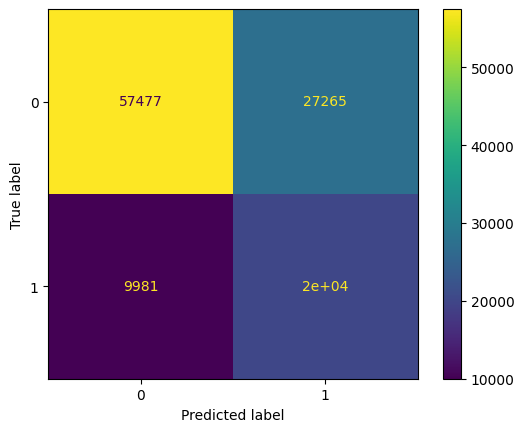

In [27]:
evaluate([0, 1], y_pred, y_true)

In [27]:
wv.most_similar('hate', topn=10)

[('people', 0.8379713296890259),
 ("n't", 0.8350358605384827),
 ('stupid', 0.8335314393043518),
 ('why', 0.8262855410575867),
 ('fuck', 0.8216034770011902),
 ('swear', 0.8184736967086792),
 ('really', 0.8134284019470215),
 ('seriously', 0.8107861876487732),
 ('when', 0.8097612261772156),
 ('because', 0.8096842765808105)]